In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = sns.load_dataset("titanic")

In [3]:
# Know the data
print(f'Shape of data: {df.shape}')
print('-'*100)
print(df.head())

Shape of data: (891, 15)
----------------------------------------------------------------------------------------------------
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


From the displayed data, it can be concluded that there are few columns which are giving same info but in different form. Like
- survived and alive 
- sex and who and adult_male
- embarked and embarked_town
- pclass and class
    
So, lets drop these columns

In [4]:
df.drop(columns = ['alive','who','adult_male','embark_town','class'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
 9   alone     891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.9+ KB


In [5]:
print('-'*100)
print('Missing/Null Values:\n', df.isnull().sum())
print('-'*100)
print('Stats:\n', df.describe(include='all'))

----------------------------------------------------------------------------------------------------
Missing/Null Values:
 survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
alone         0
dtype: int64
----------------------------------------------------------------------------------------------------
Stats:
           survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000   

So, there are 3 columns that need to be worked on before moving forward with the analysis.
- age
    - null values can be replaced by median
- embarked
    - null values can be replaced by the most frequently used Port of Embarkation (mode)
- deck
    - in this more than 70% values are missing, so ideally it should be dropped. But there can be some significant info available from this column. So, lets replace NaN with 'N'

In [6]:
# Replacing with median in 'age' column
df['age'] = df['age'].fillna(df['age'].median())

# Replacing with mode in 'embarked' column
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Replacing NaN with 'N' in 'deck' column
df['deck'] = df['deck'].astype('object').fillna('N').astype('category')

In [7]:
# checking data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       891 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  891 non-null    object  
 8   deck      891 non-null    category
 9   alone     891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.9+ KB


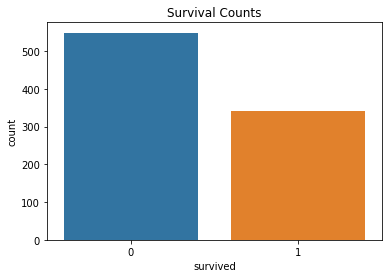

In [8]:
# Visualization
# Survival count
sns.countplot(x='survived', data=df)
plt.title("Survival Counts")
plt.show()


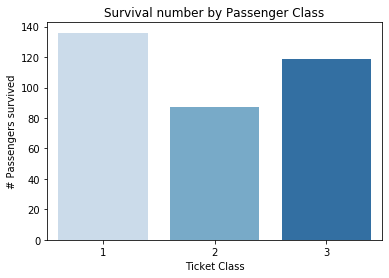

In [20]:
# Survival by Class
sns.barplot(x='pclass', y='survived', data=df, estimator=sum, errorbar=None, palette='Blues')
plt.title("Survival number by Passenger Class")
plt.xlabel('Ticket Class')
plt.ylabel('# Passengers survived')
plt.show()

C:\Users\Shatakshi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Shatakshi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Shatakshi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


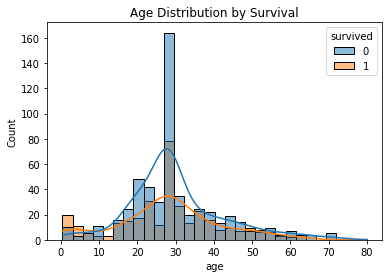

In [11]:
# Age distribution by survival
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


C:\Users\Shatakshi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Shatakshi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Shatakshi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


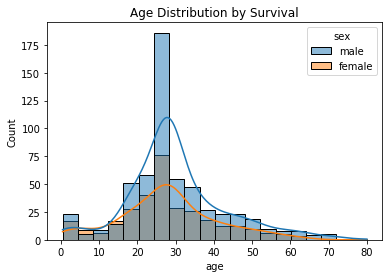

In [13]:
# Age distribution by sex
sns.histplot(data=df, x='age', hue='sex', bins=20, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

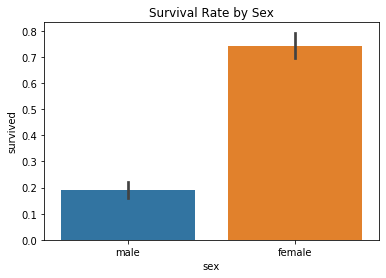

In [19]:
# Sex vs Survival
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

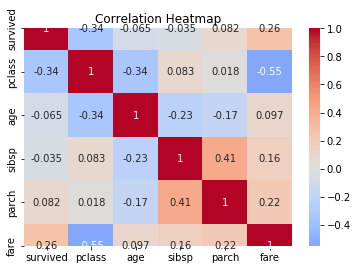

In [21]:
# Correlation heatmap
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

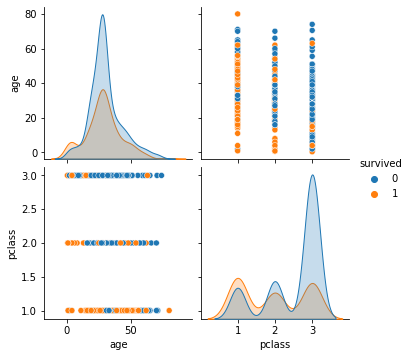

In [25]:
# Pairplot of key numeric features
sns.pairplot(df[['survived', 'age', 'pclass']], hue='survived', diag_kind='kde')
plt.show()

In [27]:
# Simple Numeric Summary

survival_by_sex = df.groupby('sex')['survived'].mean()
survival_by_class = df.groupby('pclass')['survived'].mean()

print("\nSurvival rate by sex:\n", survival_by_sex)
print("\nSurvival rate by class:\n", survival_by_class)


Survival rate by sex:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Survival rate by class:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64
